# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**Team ZF4**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [31]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns

# Libraries for data preparation and model building
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression

# Libraries for model evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Setting global constants to ensure notebook results are reproducible
#PARAMETER_CONSTANT = ###
RANDOM_SPLIT = 1

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [2]:
df = pd.read_csv('utils/data/df_train.csv')

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


## Data Dimensions and Columns Exploration

In [3]:
# Settings to display all columns
pd.set_option('display.max_columns', None)
# View some of the data
df.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,6.333333,42.666667,0.0,3.333333,0.0,sp25,0.0,0.0,1036.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.000000,800.0,1002.666667,274.254667,971.333333,269.888000,269.888000,800.0,274.254667,75.666667,269.888000,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,4.000000,139.000000,0.0,3.333333,0.0,sp25,0.0,0.0,1037.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.666667,800.0,1004.333333,274.945000,972.666667,271.728333,271.728333,800.0,274.945000,71.000000,271.728333,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,2.000000,326.000000,0.0,2.666667,0.0,sp25,0.0,0.0,1038.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1005.333333,278.792000,974.000000,278.008667,278.008667,800.0,278.792000,65.666667,278.008667,281.583667,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,2.333333,273.000000,0.0,4.000000,0.0,sp25,0.0,0.0,1037.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1009.000000,285.394000,994.666667,284.899552,284.899552,800.0,285.394000,54.000000,284.899552,283.434104,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,4.333333,260.000000,0.0,3.000000,0.0,sp25,0.0,0.0,1035.000000,0.0,0.0,0.0,0.0,800.0,800.0,1035.333333,800.0,NaN,285.513719,1035.333333,283.015115,283.015115,800.0,285.513719,58.333333,283.015115,284.213167,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


We can see that the `Unnamed:0` column contains identical data to the index, so it can be removed from the dataset in the feature engineering section.

In [4]:
# Check the data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8763 non-null   int64  
 1   time                  8763 non-null   object 
 2   Madrid_wind_speed     8763 non-null   float64
 3   Valencia_wind_deg     8763 non-null   object 
 4   Bilbao_rain_1h        8763 non-null   float64
 5   Valencia_wind_speed   8763 non-null   float64
 6   Seville_humidity      8763 non-null   float64
 7   Madrid_humidity       8763 non-null   float64
 8   Bilbao_clouds_all     8763 non-null   float64
 9   Bilbao_wind_speed     8763 non-null   float64
 10  Seville_clouds_all    8763 non-null   float64
 11  Bilbao_wind_deg       8763 non-null   float64
 12  Barcelona_wind_speed  8763 non-null   float64
 13  Barcelona_wind_deg    8763 non-null   float64
 14  Madrid_clouds_all     8763 non-null   float64
 15  Seville_wind_speed   

We notice that there are a few `object` data type columns, which we will have to deal with in order to utilise them in the model.

In addition to this, we notice that `Valencia_pressure` has null values.

We will deal with these issues as part of data cleaning before analysing the data statistics in order to get accurate results during the analysis stage.

## Data Cleaning

Data cleaning is an essential part of a Data Science project. In order to replicate this part of the cleaning process of the training data in the test data, we will create functions to form part of a bigger data preprocessing function.

### Dealing with null values

We will start by checking the percentage of nulls contained in `Valencia_pressure`.

In [5]:
df.isnull().sum()

Unnamed: 0                 0
time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather

In [6]:
print('Valencia_pressure percentage of null values is:', round((2068 / df.shape[0]) * 100, 2), '%')

Valencia_pressure percentage of null values is: 23.6 %


We find that `Valencia_pressure` has 2068 null values. The percentage of null values is 23.6%. For the purposes of data exploration we do not want to drop this feature, and will instead impute either the median, mean, or mode.

In [7]:
print('Valencia_pressure mean:', df.Valencia_pressure.mean())
print('Valencia_pressure median:', df.Valencia_pressure.median())
print('Valencia_pressure mode: ', df.Valencia_pressure.mode())

Valencia_pressure mean: 1012.0514065222828
Valencia_pressure median: 1015.0
Valencia_pressure mode:  0    1018.0
dtype: float64


We find the the mean, median, and mode are quite close to each other, so it would be possible to impute any of these values without it affecting the analysis too much.

#### Imputing the mode to `Valencia_pressure`

Before imputing the values, we will first make a copy of our data so that we can keep the original state of our data while we undertake the process of cleaning the data.

In [8]:
df_clean = df.copy()

In [9]:
def impute_valencia_pressure_mode(df):
    '''
    Function to impute the mode to the null values of the Valencia_pressure feature.
    
    Parameters:
        df (DataFrame): A Pandas DataFrame containing the data to be cleaned.
    
    Returns:
        df(DataFrame): The same DataFrame object with Valencia_pressure imputed with the mode.
    '''
    
    # impute the null values with the mode
    df['Valencia_pressure'] = df['Valencia_pressure'].fillna(df['Valencia_pressure'].mode()[0])
    
    return df

In [10]:
df_clean = impute_valencia_pressure_mode(df_clean)

### Converting object data types to numeric data

We now consider dealing with the `time`, `Valencia_wind_deg`, and `Seville_pressure` features. We first get a view of the format of the data before considering how best to convert these into numeric data.

#### Dealing with `time`

In [11]:
df_clean.time.head(3)

0    2015-01-01 03:00:00
1    2015-01-01 06:00:00
2    2015-01-01 09:00:00
Name: time, dtype: object

We notice that the `time` data is in a `datetime` format, though stored as an `object` type. We want to convert this to the `datetime` data type in order to do some feature engineering. This process will be handled when we perform feature engineering later.

#### Dealing with `Valencia_wind_deg`

We first inspect the data format of this feature before deciding how best to transform this data to a numeric data type. We have already seen a sample of the first five entries of the data, which appeared to be in a consistent format: level_number where number is an integer value. We will first inspect the variety of unique values in this column before deciding how best to transform these values.

In [12]:
df_clean.Valencia_wind_deg.unique()

array(['level_5', 'level_10', 'level_9', 'level_8', 'level_7', 'level_6',
       'level_4', 'level_3', 'level_1', 'level_2'], dtype=object)

We see that the format of the values remain constant and contains integers in the range 1-10. This can be used to obtain a numerical categorical feature.

In [13]:
def convert_valencia_wind_deg(df):
    '''
    Function to convert the Valencia_wind_deg feature to a numerical data type.
    
    Parameters:
        df (DataFrame): A Pandas DataFrame containing the feature to be converted.
        
    Returns:
        df (DataFrame): A Pandas DataFrame with the Valencia_wind_deg feature converted to a numeric data type.
    '''
    
    # extract the numerical part of the string
    df['Valencia_wind_deg'] = df['Valencia_wind_deg'].str.extract('(\d+)')
    # convert the numerical string to numeric data type
    df['Valencia_wind_deg'] = pd.to_numeric(df['Valencia_wind_deg'])
    
    return df

In [14]:
df_clean = convert_valencia_wind_deg(df_clean)

#### Dealing with `Seville_pressure`

We first inspect the data format of this feature before deciding how best to transform this data to a numeric data type. We have already seen a sample of the first five entries of the data, which appeared to be in a consistent format: spNumber, where Number is an integer value. We will first inspect the variety of unique values in this column before deciding how best to transform these values.

In [15]:
df_clean.Seville_pressure.unique()

array(['sp25', 'sp23', 'sp24', 'sp21', 'sp16', 'sp9', 'sp15', 'sp19',
       'sp22', 'sp11', 'sp8', 'sp4', 'sp6', 'sp13', 'sp17', 'sp20',
       'sp18', 'sp14', 'sp12', 'sp5', 'sp10', 'sp7', 'sp3', 'sp2', 'sp1'],
      dtype=object)

We notice that the values range from sp1 to sp25 and all contain integers after sp. We can use this to extract the numerical part of the value and convert it to numeric data type.

In [16]:
def convert_seville_pressure(df):
    '''
    Function to convert the Seville_pressure feature to a numerical data type.
    
    Parameters:
        df (DataFrame): A Pandas DataFrame containing the feature to be converted.
        
    Returns:
        df (DataFrame): A Pandas DataFrame with the Seville_pressure feature converted to a numeric data type.
    '''
    
    # extract the numerical part of the string
    df['Seville_pressure'] = df['Seville_pressure'].str.extract('(\d+)')
    # convert the numerical string to numeric data type
    df['Seville_pressure'] = pd.to_numeric(df['Seville_pressure'])
    
    return df

In [17]:
df_clean = convert_seville_pressure(df_clean)

### Removing noise: `Unnamed: 0`

As mentioned before, this column contains exact values contained in the index, and since these are 100% unique values, they do not add any exlanatory power and therefore it is best to remove it from the dataset. We will create a function to do this so that this preprecessing step can be replicated for the test data.

In [18]:
def remove_unnamed(df):
    '''
    Function to remove the Unnamed: 0 column from the dataset.
    
    Parameters:
        df (DataFrame): The Pandas DataFrame containing the column Unnamed: 0.
        
    Returns:
        df (DataFrame): A Pandas DataFrame without the Unnamed: 0 column.
    '''
    
    df = df.drop(['Unnamed: 0'], axis=1)
    return df

In [19]:
df_clean = remove_unnamed(df_clean)

## Inspect Cleaned Dataset

In [20]:
df_clean.head()

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,2015-01-01 03:00:00,0.666667,5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,6.333333,42.666667,0.0,3.333333,0.0,25,0.0,0.0,1036.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.000000,800.0,1002.666667,274.254667,971.333333,269.888000,269.888000,800.0,274.254667,75.666667,269.888000,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,2015-01-01 06:00:00,0.333333,10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,4.000000,139.000000,0.0,3.333333,0.0,25,0.0,0.0,1037.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.666667,800.0,1004.333333,274.945000,972.666667,271.728333,271.728333,800.0,274.945000,71.000000,271.728333,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2015-01-01 09:00:00,1.000000,9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,2.000000,326.000000,0.0,2.666667,0.0,25,0.0,0.0,1038.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1005.333333,278.792000,974.000000,278.008667,278.008667,800.0,278.792000,65.666667,278.008667,281.583667,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,2015-01-01 12:00:00,1.000000,8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,2.333333,273.000000,0.0,4.000000,0.0,25,0.0,0.0,1037.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1009.000000,285.394000,994.666667,284.899552,284.899552,800.0,285.394000,54.000000,284.899552,283.434104,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,2015-01-01 15:00:00,1.000000,7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,4.333333,260.000000,0.0,3.000000,0.0,25,0.0,0.0,1035.000000,0.0,0.0,0.0,0.0,800.0,800.0,1035.333333,800.0,1018.000000,285.513719,1035.333333,283.015115,283.015115,800.0,285.513719,58.333333,283.015115,284.213167,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


It seems the data cleaning process has worked. We have yet to work with our time feature, but for now we will move on to explore some data statistics.

## Data Statistics

### Look at data statistics


In [21]:
df_clean.describe()

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8.763000e+03,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,2.425729,5.276389,0.135753,2.586272,62.658793,57.414717,43.469132,1.850356,13.714748,158.957511,2.870497,190.544848,19.473392,2.425045,0.128906,13.507246,0.039439,0.031912,1.377965e+03,0.000243,0.037818,0.000439,0.000205,773.527594,765.979687,1017.739549,774.658818,1013.455228,297.479527,1010.316920,291.337233,290.592152,724.722362,293.978903,65.247727,289.867648,291.157644,289.540309,289.855459,285.017973,286.422929,288.447422,287.966027,291.633356,288.419439,287.202203,10673.857612
std,1.850371,2.877642,0.374901,2.411190,22.621226,24.335396,32.551044,1.695888,24.272482,102.056299,1.792197,89.077337,28.053660,1.672895,0.634730,7.237267,0.175857,0.557264,1.407314e+04,0.003660,0.152639,0.003994,0.011866,77.313315,88.142235,10.046124,71.940009,8.684485,8.875812,22.198555,7.565692,7.162274,115.846537,7.920986,19.262322,6.907402,7.273538,9.752047,6.528111,6.705672,6.818682,6.102593,7.105590,8.178220,9.346796,9.206237,5218.046404
min,0.000000,1.000000,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,6.706667e+02,0.000000,0.000000,0.000000,0.000000,211.000000,200.666667,971.333333,200.000000,972.666667,272.063000,927.666667,269.888000,269.888000,207.333333,272.063000,10.333333,269.888000,272.150000,264.983333,270.816667,264.483333,267.483333,269.483333,269.063000,270.150000,264.983333,264.983333,-6618.000000
25%,1.000000,3.000000,0.000000,1.000000,44.333333,36.333333,10.000000,0.666667,0.000000,73.333333,1.666667,118.166667,0.000000,1.000000,0.000000,7.000000,0.000000,0.000000,1.014000e+03,0.000000,0.000000,0.000000,0.000000,800.000000,800.000000,1013.000000,800.000000,1012.666667,291.312750,1012.333333,285.550167,285.150000,700.333333,288.282917,51.333333,284.783333,285.483333,282.150000,284.973443,280.085167,281.374167,284.150000,282.836776,285.816667,281.404281,280.299167,7390.333333
50%,2.000000,5.000000,0.000000,1.666667,65.666667,58.000000,45.000000,1.000000,0.000000,147.000000,2.666667,200.000000,0.000000,2.000000,0.000000,14.000000,0.000000,0.000000,1.018000e+03,0.000000,0.000000,0.000000,0.000000,800.000000,800.333333,1019.000000,800.000000,1017.000000,297.101667,1017.333333,291.037000,290.176667,800.000000,293.323333,67.000000,289.550000,290.150000,288.116177,289.416667,284.816667,286.158333,288.150000,287.630000,290.816667,287.053333,286.083333,11114.666667
75%,3.333333,8.000000,0.100000,3.666667,82.000000,78.666667,75.000000,2.666667,20.000000,234.000000,4.000000,260.000000,33.333333,3.333333,0.000000,20.000000,0.000000,0.000000,1.022000e+03,0.000000,0.000000,0.000000,0.0000

### Plot relevant feature interactions

### Evaluate correlation

In this section we will get a correlation matrix and also look at a heatmap to get an idea of the correlations between the features.

In [22]:
corrs = df_clean.corr()

In [23]:
corrs

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
Madrid_wind_speed,1.000000,0.121835,0.259719,0.513092,-0.117892,-0.137092,0.244001,0.377854,0.191251,0.270950,0.294640,-0.095380,0.230126,0.434104,0.062758,-0.182792,0.108413,0.071183,0.011134,0.004795,0.150446,-0.014644,0.021660,-0.169358,-0.099582,-0.231747,-0.120014,-0.198631,0.050043,-0.136672,0.133468,0.128726,-0.238128,0.090861,-0.285787,0.119657,0.061854,0.091464,0.080133,0.077330,0.060467,0.089992,0.042114,0.110278,0.109572,0.098138,-0.150981
Valencia_wind_deg,0.121835,1.000000,0.199288,0.292731,0.240007,0.253549,0.158266,0.075864,0.085519,0.157252,0.042795,0.151146,0.105080,-0.007258,0.000699,0.274340,-0.019783,0.069929,0.026729,-0.019602,-0.017304,0.016777,0.020481,-0.003746,-0.018537,-0.099051,0.000478,-0.155041,-0.328244,-0.189989,-0.245685,-0.252334,-0.209860,-0.342016,-0.192267,-0.255626,-0.260643,-0.341696,-0.260622,-0.265992,-0.283031,-0.240981,-0.292904,-0.311775,-0.337965,-0.316603,-0.188674
Bilbao_rain_1h,0.259719,0.199288,1.000000,0.265864,0.069878,0.106765,0.370733,0.085398,0.081131,0.279350,0.069997,-0.030723,0.135524,0.140101,0.052558,0.067471,0.092984,0.096730,0.052458,0.016392,0.187423,-0.001412,0.008269,-0.147768,-0.120618,-0.054814,-0.095723,-0.224834,-0.210323,-0.298587,-0.135198,-0.127953,-0.604616,-0.170009,-0.103868,-0.116835,-0.157326,-0.148397,-0.138901,-0.141269,-0.182494,-0.106593,-0.219871,-0.120575,-0.135927,-0.116431,-0.152510
Valencia_wind_speed,0.513092,0.292731,0.265864,1.000000,-0.075227,-0.019388,0.210524,0.386478,0.163675,0.248643,0.347966,-0.066071,0.221887,0.316035,0.031804,-0.065082,0.046085,0.115133,0.050282,0.027637,0.093865,-0.037553,0.058629,-0.099056,-0.037605,-0.096374,-0.069092,-0.082930,-0.024045,-0.158475,0.065815,0.072366,-0.201379,-0.008508,-0.413017,0.075533,-0.040998,-0.021970,-0.021456,-0.010166,-0.022676,0.001413,-0.033271,0.003618,-0.011982,-0.019742,-0.142791
Seville_humidity,-0.117892,0.240007,0.069878,-0.075227,1.000000,0.799831,0.061680,-0.088180,0.399436,-0.087246,-0.138625,0.164064,0.366602,-0.202449,-0.051022,0.217941,0.227476,0.023556,0.021599,0.034343,0.164019,0.015555,0.007351,-0.228442,-0.050515,-0.099458,-0.328265,-0.049493,-0.566426,-0.103813,-0.650643,-0.663276,-0.105088,-0.743126,0.464012,-0.657427,-0.606770,-0.708937,-0.617797,-0.605493,-0.604733,-0.595065,-0.583718,-0.784850,-0.717171,-0.688664,-0.167290
Madrid_humidity,-0.137092,0.253549,0.106765,-0.019388,0.799831,1.000000,0.041878,-0.016808,0.374112,-0.069570,-0.058518,0.183725,0.484293,-0.125680,-0.061265,0.294543,0.195455,0.031653,0.025198,0.059958,0.250614,0.017797,0.012571,-0.341407,-0.051139,-0.053074,-0.291095,-0.088766,-0.576413,-0.121737,-0.705918,-0.706989,-0.139686,-0.738819,0.378980,-0.689854,-0.691803,-0.803260,-0.684867,-0.635760,-0.634825,-0.636777,-0.611395,-0.769591,-0.802605,-0.759633,-0.150536
Bilbao_clouds_all,0.244001,0.158266,0.370733,0.210524,0.061680,0.041878,1.000000,0.031915,0.046737,0.280154,0.094019,-0.065120,0.109788,0.075066,0.052913,-0.038859,0.041090,0.080180,0.037506,0.009557,0.089281,-0.041013,0.024339,-0.080837,-0.124169,0.000377,-0.033825,-0.125325,-0.102322,-0.135672,0.002621,-0.000299,-0.536205,-0.095003,-0.129684,-0.003806,-0.034040,-0.048491,-0.023171,-0.067731,-0.1141

Based on the data obtained from the correlation matrix above, we find that the current features are not strongly correlated (positive and negative) to the target. This affects the question of **Linearity** between the features and the target. This impacts the choice of a model, because if the relationships are not linear, then a linear regression model will not be suited to this dataset. Furthermore, we inspect the correlation between the features and notice that some features are strongly correlated with each other. This affects the question of **Multicollinearity** between features. We should avoid this and seek to drop the feature that has lower correlation to the target.

<AxesSubplot:>

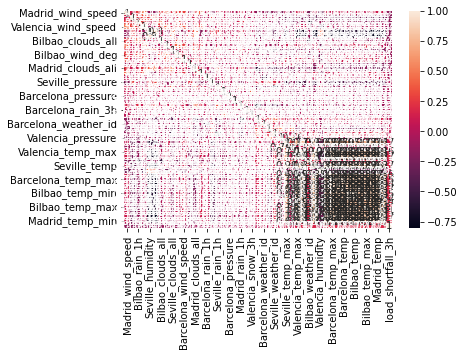

In [24]:
sns.heatmap(corrs, annot=True)

#### Exploring Linearity of Features with the Target

In [ ]:
#sns.pairplot(df_clean)

#### Exploring Multicollinearity between Features

We notice that `Madrid_humidity` and `Seville_humidity` have a correlation of **0.799831**. To explore if this is an issue, we need to consider that these features represent different cities, and so dropping one may not be beneficial to our purpose. Also, we can explore if there is a reason for this fairly strong correlation. If we look at Spain, we notice that Madrid is located 532 km away from Seville. The reason these humidity features may be correlated could be for a variety of geographical reasons.

The heatmap also revealed strong negative correlation between features in the bottom right section of the heatmap. An inspection of the correlation matrix confirms this. 

### Have a look at feature distributions

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

Having cleaned the dataset before performing data analysis, we have to ensure that we have all the features we need in order to train the model.

## Create new features

In this section we seek to create new features in the dataset.

### `time` features

We see that the `time` feature contains the `year`, `month`, `day`, and `hour`. The `minutes` and `seconds` values are both zero and can therefore be discarded. In order to make use of the `time` feature, we want to obtain numeric data types since the models we will utilise cannot use `datetime` data. For this reason, we will extract the `year`, `month`, `day`, and `hour` and create seperate columns for each of these. In addition, we will also create new features such as the `weekday` and the `week`.

#### Explanation

The reason why we create additional features such as `weekday` and `week` are because there may be patterns that emerge in relation to the target variable in terms of which day of the week it is or which week of the year it is. This means that we may discover weekly (weekdays vs. weekends) and/or seasonal (summer vs. winter) patterns in relation to the target.

In [25]:
def get_date_time_features(df):
    '''
    Extracts the year, month, day, and hour from the time feature and creates new columns for them in the DataFrame.
    It also obtains new features (1) weekday and (2) week. These features are inserted at the front of the dataset.
    It then drops the original time feature.
    
    Parameters:
        df (DataFrame): The Pandas DataFrame containing the data to be cleaned.
        
    Returns:
        df(DataFrame): The same DataFrame with time feature dropped and new columns for year, month, day, hour, weekday, week.
    '''
    
    # convert time feature to datetime data type
    df['time'] = pd.to_datetime(df['time'])
    
    # obtain new features from the time feature and insert them at the beginning of the dataset
    df.insert(1, 'year', df['time'].dt.year)
    df.insert(2, 'month', df['time'].dt.month)
    df.insert(3, 'day', df['time'].dt.day) # day of the month
    df.insert(4, 'hour', df['time'].dt.hour)
    df.insert(5, 'week', df['time'].dt.isocalendar().week) # week of the year
    df.insert(6, 'weekday', df['time'].dt.weekday + 1) # day of the week: Monday is 1, Sunday is 7
    
    # we now drop the time column
    df = df.drop(['time'], axis=1)
    
    return df

In [26]:
df_clean = get_date_time_features(df_clean)

In [27]:
# inspect the new dataframe
df_clean.head()

,year,month,day,hour,week,weekday,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,2015,1,1,3,1,4,0.666667,5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,6.333333,42.666667,0.0,3.333333,0.0,25,0.0,0.0,1036.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.000000,800.0,1002.666667,274.254667,971.333333,269.888000,269.888000,800.0,274.254667,75.666667,269.888000,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,2015,1,1,6,1,4,0.333333,10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,4.000000,139.000000,0.0,3.333333,0.0,25,0.0,0.0,1037.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.666667,800.0,1004.333333,274.945000,972.666667,271.728333,271.728333,800.0,274.945000,71.000000,271.728333,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2015,1,1,9,1,4,1.000000,9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,2.000000,326.000000,0.0,2.666667,0.0,25,0.0,0.0,1038.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1005.333333,278.792000,974.000000,278.008667,278.008667,800.0,278.792000,65.666667,278.008667,281.583667,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,2015,1,1,12,1,4,1.000000,8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,2.333333,273.000000,0.0,4.000000,0.0,25,0.0,0.0,1037.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1009.000000,285.394000,994.666667,284.899552,284.899552,800.0,285.394000,54.000000,284.899552,283.434104,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,2015,1,1,15,1,4,1.000000,7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,4.333333,260.000000,0.0,3.000000,0.0,25,0.0,0.0,1035.000000,0.0,0.0,0.0,0.0,800.0,800.0,1035.333333,800.0,1018.000000,285.513719,1035.333333,283.015115,283.015115,800.0,285.513719,58.333333,283.015115,284.213167,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [ ]:
# engineer existing features

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [28]:
# create targets and features dataset
X = df_clean.drop('load_shortfall_3h', axis=1)
y = df_clean['load_shortfall_3h']

#### Scaling the Data using Standardisation

When inspecting the range of values and the respective scales used in the different features, we notice that there is a large discrepency. For this reason, we implement scaling in order to perform regularisation on the data and to be able to compare the relative influence of each feature on the target when making predictions.

We will use Z-score standardisation instead of normalisation since it is robust to outliers and takes into consideration the distribution of the feature.

In [32]:
# standardise the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# View the scaled data
X_scaled.head()

,year,month,day,hour,week,weekday,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
0,-1.226179,-1.602429,-1.675368,-1.090901,-1.709703,-0.00274,-0.950708,-0.096053,-0.362123,-0.796169,0.516117,0.270621,-1.335491,-0.501451,-0.565065,0.630823,1.932284,-1.660205,-0.694188,0.542975,-0.203099,1.588087,-0.224278,-0.057269,-0.024277,-0.066278,-0.247776,-0.110037,-0.017312,0.342424,0.385993,1.718219,0.352274,-1.242351,-2.616796,-1.756232,-2.835227,-2.890888,0.649842,-2.490266,0.540928,-2.892663,-1.394813,-2.420380,-1.354598,-2.338357,-2.505658,-1.218309,-2.621665,-2.125118,-2.405393,-2.309892
1,-1.226179,-1.602429,-1.675368,-0.654451,-1.709703,-0.00274,-1.130863,1.641580,-0.362123,-0.381412,0.692953,0.298017,-1.335491,-0.501451,-0.565065,0.607959,0.630270,-0.578686,-0.694188,0.542975,-0.203099,1.588087,-0.224278,-0.057269,-0.024206,-0.066278,-0.247776,-0.110037,-0.017312,0.342424,0.385993,1.784583,0.352274,-1.050427,-2.539014,-1.696165,-2.591966,-2.633926,0.649842,-2.403108,0.298645,-2.626219,-1.456868,-2.374370,-1.423738,-2.183645,-2.353511,-1.292271,-2.475661,-2.040702,-2.357388,-2.261154
2,-1.226179,-1.602429,-1.675368,-0.218001,-1.709703,-0.00274,-0.770554,1.294054,-0.362123,-0.657917,0.383491,0.284319,-1.335491,-0.501451,-0.565065,0.542632,-0.485743,1.520733,-0.694188,0.144442,-0.203099,1.588087,-0.224278,-0.057269,-0.024158,-0.066278,-0.247776,-0.110037,-0.017312,0.342424,0.385993,1.817765,0.352274,-0.935272,-2.105564,-1.636097,-1.761812,-1.757012,0.649842,-1.917409,0.021750,-1.716949,-1.316350,-1.726058,-1.267176,-1.489980,-1.671342,-1.124792,-1.821036,-1.570279,-1.680968,-1.574407
3,-1.226179,-1.602429,-1.675368,0.218449,-1.709703,-0.00274,-0.770554,0.946527,-0.362123,-0.657917,0.118238,-0.044439,-1.335491,-0.501451,-0.565065,0.398912,-0.299741,0.925711,-0.694188,0.941509,-0.203099,1.588087,-0.224278,-0.057269,-0.024229,-0.066278,-0.247776,-0.110037,-0.017312,0.342424,0.385993,1.817765,0.352274,-0.513039,-1.361703,-0.705052,-0.850953,-0.794849,0.649842,-1.083879,-0.583957,-0.719283,-1.061929,-0.783992,-0.983703,-0.579082,-0.775541,-0.821553,-0.961406,-0.762967,-0.698057,-0.576488
4,-1.226179,-1.602429,-1.675368,0.654899,-1.709703,-0.00274,-0.770554,0.599000,-0.362123,-0.657917,-0.161751,-0.017043,-1.274045,-0.894581,-0.565065,0.255192,0.816272,0.779762,-0.694188,0.343708,-0.203099,1.588087,-0.224278,-0.057269,-0.024372,-0.066278,-0.247776,-0.110037,-0.017312,0.342424,0.385993,1.751401,0.352274,0.523351,-1.348214,1.127003,-1.100044,-1.057970,0.649842,-1.068764,-0.358980,-0.992113,-0.954814,-0.908771,-0.864356,-0.412497,-0.611717,-0.693885,-0.804197,-0.748327,-0.828246,-0.708665


In [33]:
# split data into training and validation sets
# we will not use random sampling as the chronology of time is an important factor
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)

In [34]:
X_train.shape

(7010, 52)

### Model Training

We will choose linear models since these models are more interpretable as to the features that have more or less influence on the target. We will implement Linear Regression, Ridge Regression, and LASSO regression.

In [47]:
# Initialise the models
lm = LinearRegression()
ridge = Ridge()
lasso = Lasso(alpha=0.05)

In [48]:
# train the models
lm.fit(X_train, y_train)
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)

C:\Users\Stephen\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 73835710172.26956, tolerance: 18634441.993152138
  positive)


Lasso(alpha=0.05)

In [49]:
# Predictions on the training set
train_lm_pred = lm.predict(X_train)
train_ridge_pred = ridge.predict(X_train)
train_lasso_pred = lasso.predict(X_train)

### Training Evaluation

We want to explore the result of training, especially with reference to the regularised models. In particular, we want to explore the subset selection of the LASSO model and seek to use this insight.

In [50]:
# Examing training results: MSE and R2
train_results_dict = {'Training MSE':{'Linear Regression':mean_squared_error(y_train, train_lm_pred),
                                     'Ridge':mean_squared_error(y_train, train_ridge_pred),
                                     'Lasso':mean_squared_error(y_train, train_lasso_pred)
                                     },
                     'Training R2:':{'Linear Regression':r2_score(y_train, train_lm_pred),
                                    'Ridge':r2_score(y_train, train_ridge_pred),
                                    'Lasso':r2_score(y_train, train_lasso_pred)
                                    }
                     }

train_results_df = pd.DataFrame(data=train_results_dict)
train_results_df

,Training MSE,Training R2:
Linear Regression,2.203507e+07,0.171074
Ridge,2.203760e+07,0.170978
Lasso,2.203946e+07,0.170908


We see that on the training set, the Linear Regression has a lower MSE and higher R2 than both the Ridge and Lasso models. This may seem to indicate that the Linear Regression model is the best of the three, but we need to evaluate the performance on unseen data before making this conclusion. The reason for this is that we do not know if the Linear Regression model has overfit on the training data. In order to evaluate which model generalises better, we need to use the validation set.

In [51]:
# Explore intercepts of each model
lm_b0 = float(lm.intercept_)
ridge_b0 = float(ridge.intercept_)
lasso_b0 = float(lasso.intercept_)

print('Linear Regression Intercept:\t', lm_b0)
print('Ridge Intercept:\t\t', ridge_b0)
print('Lasso Intercept:\t\t', lasso_b0)

Linear Regression Intercept:	 10391.069579705276
Ridge Intercept:		 10396.407162213853
Lasso Intercept:		 10393.62465514134


In [52]:
# Explore coefficients of each model
lm_coef_df = pd.DataFrame(lm.coef_, X.columns, columns=['Linear Regression Coefficients'])
ridge_coef_df = pd.DataFrame(ridge.coef_, X.columns, columns=['Ridge Coefficients'])
lasso_coef_df = pd.DataFrame(lasso.coef_, X.columns, columns=['Lasso Coefficients'])

coef_df_list = [lm_coef_df, ridge_coef_df, lasso_coef_df]
coef_df = pd.concat(coef_df_list, axis=1)
coef_df

,Linear Regression Coefficients,Ridge Coefficients,Lasso Coefficients
year,-136.238197,-126.999606,-131.607077
month,151.622236,155.311920,148.086527
day,345.003291,341.872357,341.866274
hour,622.718477,622.808189,623.218269
week,118.208199,119.551529,120.585843
weekday,-724.246646,-724.192821,-724.494945
Madrid_wind_speed,-423.596563,-420.367890,-425.560720
Valencia_wind_deg,-153.612408,-154.495950,-154.932550
Bilbao_rain_1h,-196.398208,-198.216140,-197.291673
Valencia_wind_speed,-123.007796,-119.266450,-121.329801


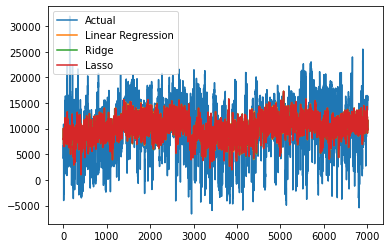

In [56]:
# plot training predictions vs. actual training target
plt.plot(np.arange(len(y_train)), y_train, label='Actual')
plt.plot(np.arange(len(y_train)), train_lm_pred, label='Linear Regression')
plt.plot(np.arange(len(y_train)), train_ridge_pred, label='Ridge')
plt.plot(np.arange(len(y_train)), train_lasso_pred, label='Lasso')
plt.legend()
plt.show()

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [ ]:
# Compare model performance

In [ ]:
# Choose best model and motivate why it is the best choice

In [ ]:
# Saving the chosen model

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic